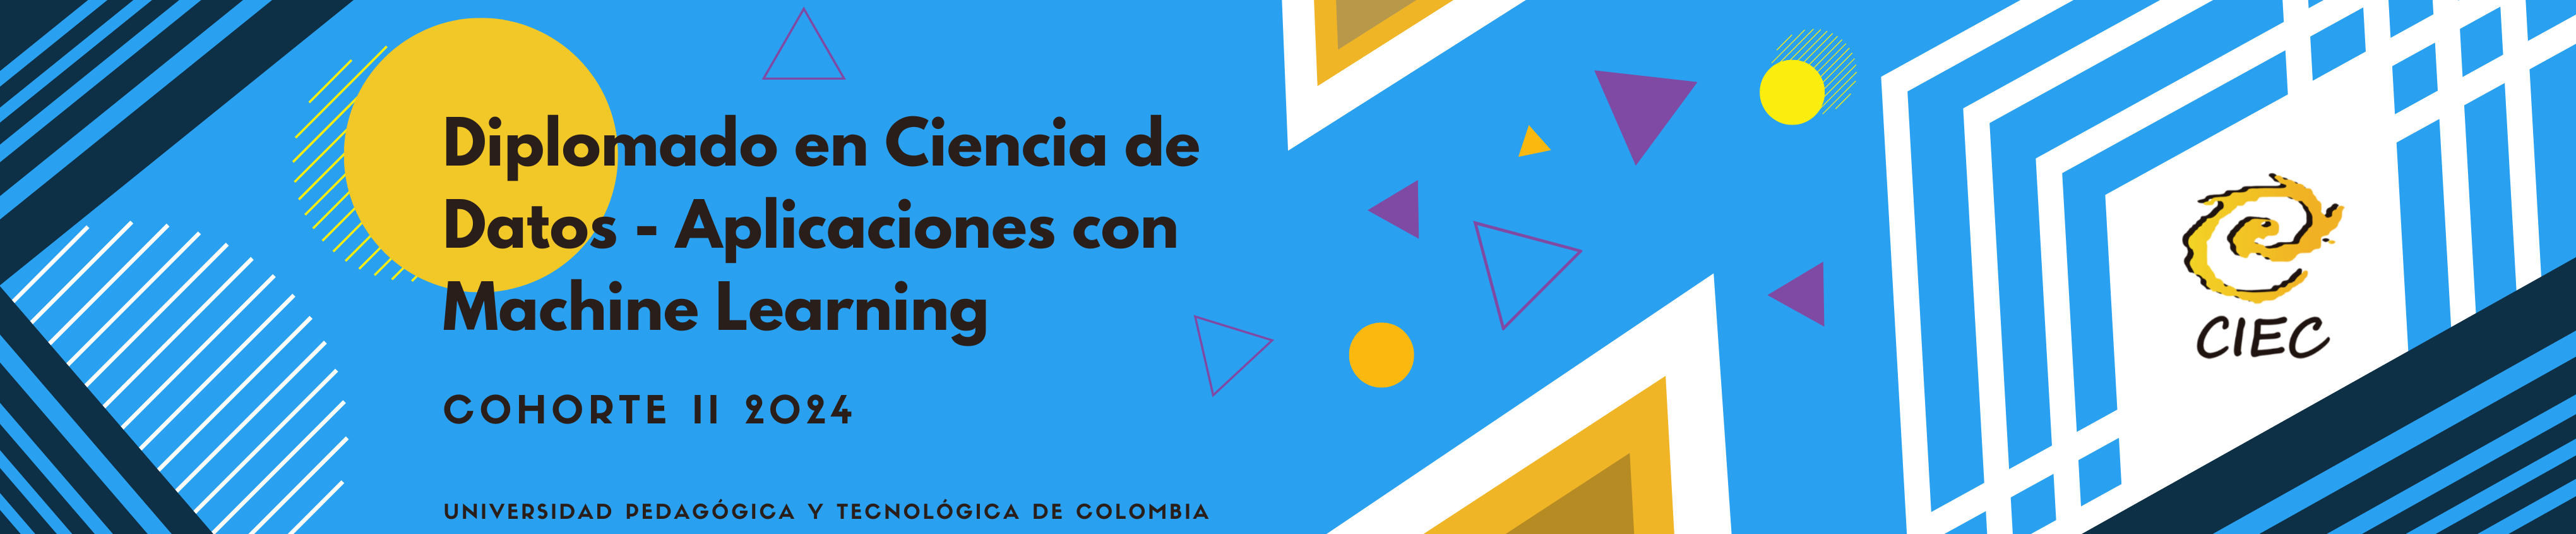

<h1 style="color: #FECB05; text-align: center;"> TriMAP </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Funcionamiento de TriMAP</span>](#dim-curse)
- [<span style="color: #005C99;">Diferencias entre UMAP y TriMAP</span>](#reference)
- [<span style="color: #005C99;">Parámetros básicos de TRIMAP</span>](#reference)
- [<span style="color: #005C99;">Uso de TRIMAP</span>](#reference)
- [<span style="color: #005C99;">Referencias</span>](#reference)

---

<h2 style="color: #007ACC;"> Introducción </h2>

TRIMAP (Triangular Map) es una técnica de reducción de dimensionalidad desarrollada para mejorar la preservación de la estructura global de los datos en comparación con otras técnicas como t-SNE y UMAP. Esta técnica es particularmente útil para la visualización y el análisis de datos de alta dimensionalidad, ya que busca mantener tanto las relaciones locales como las globales entre los puntos de datos. TRIMAP se basa en la construcción de relaciones triádicas y utiliza una configuración de optimización para proyectar los datos en un espacio de menor dimensionalidad, facilitando así la identificación de patrones y estructuras en los datos originales.

---

<h2 style="color: #007ACC;"> Funcionamiento de TriMAP </h2>

Para cada punto en el espacio de alta dimensionalidad, TRIMAP selecciona un conjunto de vecinos cercanos (inliers) y un conjunto de puntos lejanos (outliers). Este proceso se realiza de la siguiente manera:

- Vecinos Cercanos (Inliers): TRIMAP selecciona los puntos más cercanos a un punto dado. El número de estos vecinos se controla mediante el parámetro n_inliers. Estos vecinos cercanos ayudan a preservar la estructura local de los datos, asegurando que los puntos que estaban cerca en el espacio de alta dimensionalidad permanezcan cerca en el espacio reducido.

- Puntos Lejanos (Outliers): TRIMAP también selecciona un conjunto de puntos que están lejos del punto dado. El número de estos puntos lejanos se controla mediante el parámetro n_outliers. La inclusión de estos puntos lejanos ayuda a preservar la estructura global, asegurando que los puntos que estaban lejos en el espacio de alta dimensionalidad sigan estando lejos en el espacio reducido.

<h3 id="subsection1-1" style="color: #003366;"> Construcción de Relaciones Triádicas</h3>

Una vez que se han seleccionado los vecinos cercanos y los puntos lejanos, TRIMAP construye relaciones triádicas (triplets) para cada punto. Estas relaciones triádicas son triples de puntos que incluyen:

- Un punto de referencia (anchor point): Este es el punto original del cual se están evaluando las relaciones.
- Un vecino cercano (inlier): Uno de los puntos seleccionados como vecino cercano.
- Un punto lejano (outlier): Uno de los puntos seleccionados como punto lejano.

Para cada punto de referencia, se forma un conjunto de triplets combinando el punto de referencia con cada uno de sus vecinos cercanos y con cada uno de sus puntos lejanos. Esto genera una gran cantidad de triplets que TRIMAP utilizará para la optimización.

<h3 id="subsection1-1" style="color: #003366;"> Optimización</h3>

TRIMAP funciona mediante la construcción de relaciones triádicas entre puntos de datos, lo que ayuda a preservar tanto la estructura local como la global. A continuación se describe su funcionamiento en detalle:

1.	Selección de Vecinos Cercanos y Lejanos: TRIMAP selecciona un conjunto de vecinos cercanos (inliers) y un conjunto de puntos lejanos (outliers) para cada punto de datos. Esta selección ayuda a definir la estructura local y global que se preservará en el espacio reducido.

2.	Construcción de Relaciones Triádicas: Para cada punto de datos, TRIMAP forma tríos (triplets) con sus vecinos cercanos y lejanos. Estas relaciones triádicas son la base para la optimización, ya que permiten comparar la proximidad relativa de los puntos en el espacio original con la proximidad en el espacio reducido.

3.	Optimización: TRIMAP utiliza un algoritmo de optimización para encontrar una configuración en el espacio reducido que minimice la discrepancia entre las relaciones triádicas en el espacio original y en el espacio reducido. Esto se hace mediante la minimización de una función de costo que penaliza las grandes discrepancias en la proximidad relativa de los puntos.

---

<h2 style="color: #007ACC;"> Diferencias entre UMAP y TriMap </h2>

Aunque TRIMAP y UMAP son técnicas de reducción de dimensionalidad, difieren en varios aspectos clave:

- Preservación de la Estructura Global: TRIMAP pone un énfasis más fuerte en la preservación de la estructura global mediante la inclusión de puntos lejanos en la construcción de triplets. UMAP, en cambio, se centra más en la estructura local, manteniendo los puntos cercanos en el espacio reducido.

- Construcción de Relaciones: TRIMAP forma triplets que incluyen un punto de referencia, un vecino cercano y un punto lejano, mientras que UMAP construye un grafo de vecindad utilizando vecinos más cercanos. Esto permite a TRIMAP capturar mejor las relaciones globales en los datos.

- Parámetros: TRIMAP introduce parámetros específicos como n_inliers, n_outliers y n_random para controlar explícitamente el equilibrio entre la estructura local y global. UMAP utiliza parámetros como n_neighbors y min_dist para ajustar principalmente la estructura local.

---

<h2 style="color: #007ACC;"> Parámetros básicos de TRIMAP </h2>

1.	n_inliers: Este parámetro define el número de puntos cercanos (inliers) que se considerarán al construir las relaciones triádicas entre los puntos. Afecta la preservación de la estructura local.

2.	n_outliers: Define el número de puntos lejanos (outliers) que se consideran al construir las relaciones triádicas. Afecta la preservación de la estructura global.

3.	n_random: Número de pares aleatorios considerados para cada punto. Ayuda a regularizar el modelo y puede afectar tanto la estructura local como la global.

4.	metric: La métrica de distancia utilizada para calcular las distancias entre los puntos en el espacio de alta dimensionalidad. Las métricas comunes incluyen ‘euclidean’, ‘manhattan’, ‘cosine’, entre otras.

5.	random_state: Una semilla para el generador de números aleatorios que se utiliza para la inicialización y para garantizar la reproducibilidad de los resultados.

---

<h2 style="color: #007ACC;"> Uso de TRIMAP </h2>

Para instalar la biblioteca `trimap`, usa el siguiente comando:

```
!pip install trimap
```

<h3 id="subsection1-1" style="color: #003366;"> Ejemplo 1: datos iris</h3>

In [2]:
import trimap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])

In [5]:
# Configurar y aplicar TRIMAP
reducer = trimap.TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance='euclidean')
embedding = reducer.fit_transform(df_scaled)

# Convertir el resultado a un DataFrame
embedding_df = pd.DataFrame(embedding, columns=['TRIMAP1', 'TRIMAP2'])
embedding_df['species'] = df['species']

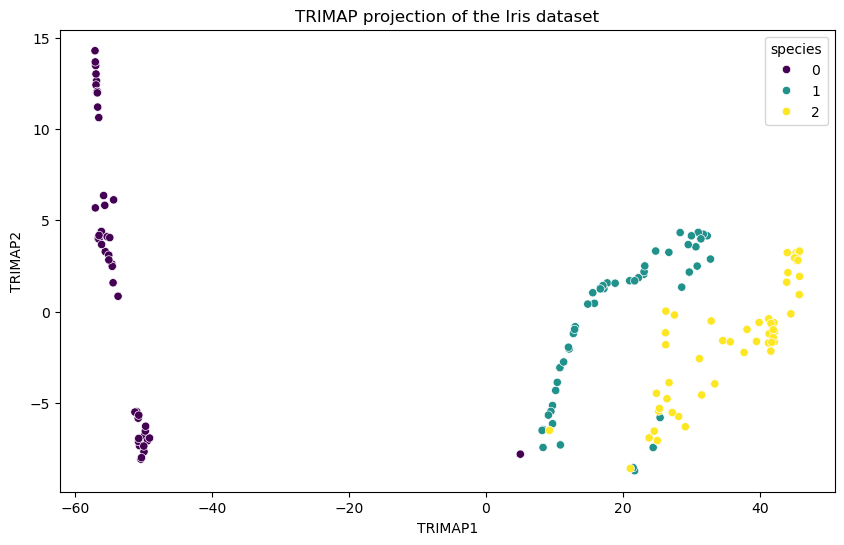

In [6]:
# Visualizar el resultado usando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TRIMAP1', y='TRIMAP2', hue='species', palette='viridis', data=embedding_df)
plt.title('TRIMAP projection of the Iris dataset')
plt.show()

<h3 id="subsection1-1" style="color: #003366;"> Ejemplo 2: datos de dígitos</h3>

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [8]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad inicial con PCA para acelerar TRIMAP
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [20]:
# Configurar y aplicar TRIMAP con diferentes valores de n_inliers y n_outliers
reducer = trimap.TRIMAP(n_inliers=10, n_outliers=5, n_random=10, distance='euclidean')
embedding = reducer.fit_transform(X_pca)

<AxesSubplot: xlabel='TRIMAP1', ylabel='TRIMAP2'>

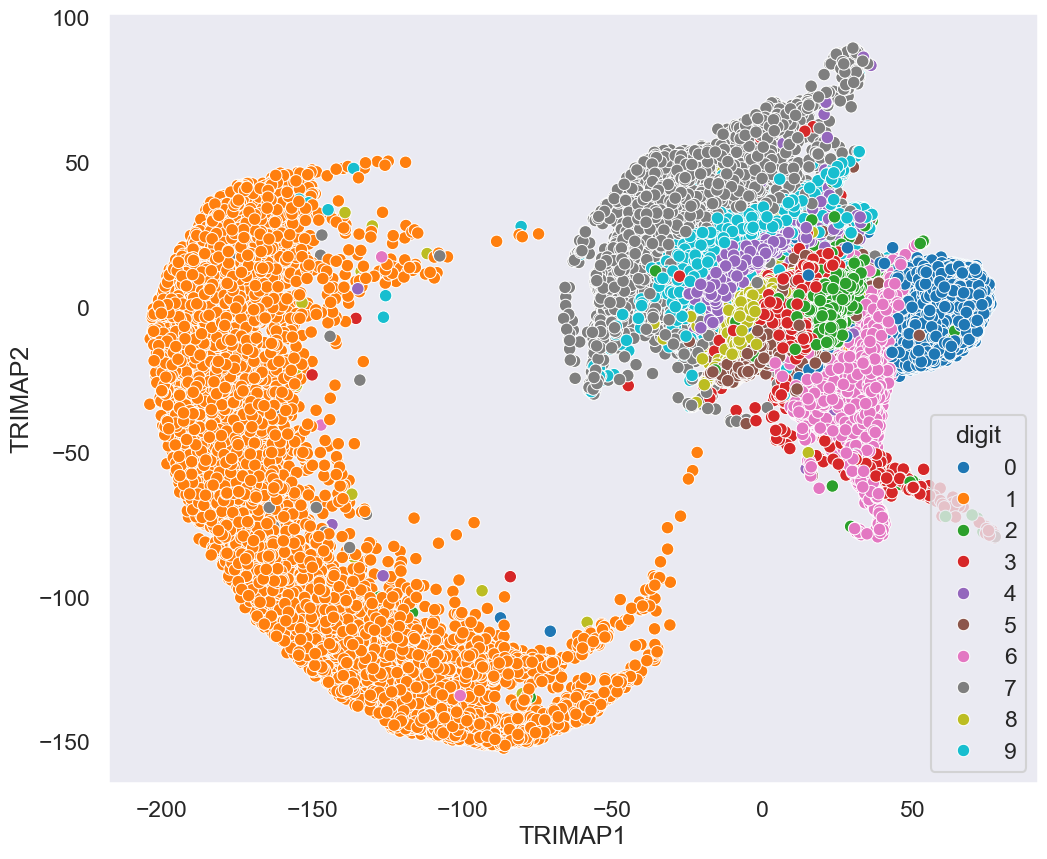

In [22]:
# Convertir los resultados a DataFrames
embedding_df = pd.DataFrame(embedding_1, columns=['TRIMAP1', 'TRIMAP2'])
embedding_df_1['digit'] = y

# Visualizar los resultados usando Seaborn
plt.figure(figsize=(12, 10))

sns.scatterplot(x='TRIMAP1', y='TRIMAP2', hue='digit', palette='tab10', data=embedding_df_1, legend='full')

<h3 id="subsection1-1" style="color: #003366;"> Ejemplo 3: Comparaciones entre diferentes técnicas de visualización</h3>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import trimap
from sklearn.preprocessing import StandardScaler

In [15]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Reducir la dimensionalidad con PCA a 50 componentes para acelerar t-SNE, UMAP y TRIMAP
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# UMAP
reducer_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
X_umap = reducer_umap.fit_transform(X_pca)

# TRIMAP
reducer_trimap = trimap.TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance='euclidean')
X_trimap = reducer_trimap.fit_transform(X_pca)

# PCA (2 componentes)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

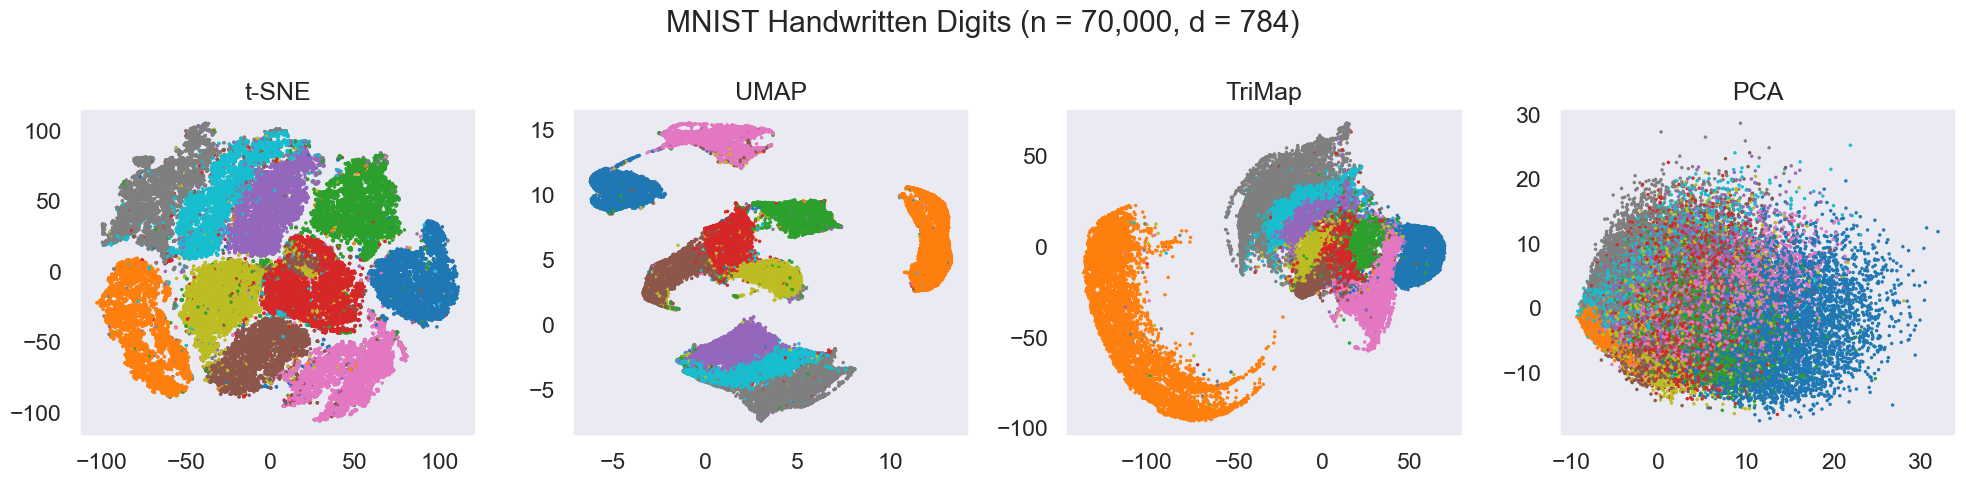

In [19]:
# Configurar el estilo de los gráficos
sns.set(style='dark', context='talk', rc={'figure.figsize': (15, 7)})

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# t-SNE
axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=1)
axes[0].set_title('t-SNE')

# UMAP
axes[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=1)
axes[1].set_title('UMAP')

# TRIMAP
axes[2].scatter(X_trimap[:, 0], X_trimap[:, 1], c=y, cmap='tab10', s=1)
axes[2].set_title('TriMap')

# PCA
axes[3].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', s=1)
axes[3].set_title('PCA')

# Añadir títulos y ajustar diseño
fig.suptitle('MNIST Handwritten Digits (n = 70,000, d = 784)')
plt.tight_layout()
plt.show()

---

<h2 id="reference" style="color: #007ACC;">Referencias</h2>

- Artículo original con la propuesta del modelo TriMAP: https://arxiv.org/abs/1910.00204
- Repositorio original del modelo: https://github.com/eamid/trimap?tab=readme-ov-file

**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Juan Felipe Contreras Alcívar

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---